In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import itertools
from scipy.stats import pearsonr

from fit import get_expectations_carrabin
palette = sns.color_palette('tab10')
sns.set_palette(palette)
sns.set(context='paper', style='white', font="cmr10", font_scale=1.2)
plt.rcParams['axes.formatter.use_mathtext'] = True

# Model Performance (abs_qid_loss)

/tmp/ipykernel_80025/1490747797.py:16: UserWarning: 
The palette list has fewer values (4) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(combined, x='type', y='loss', hue='type', ax=ax, palette=palette[:4], notch=False, width=0.5)


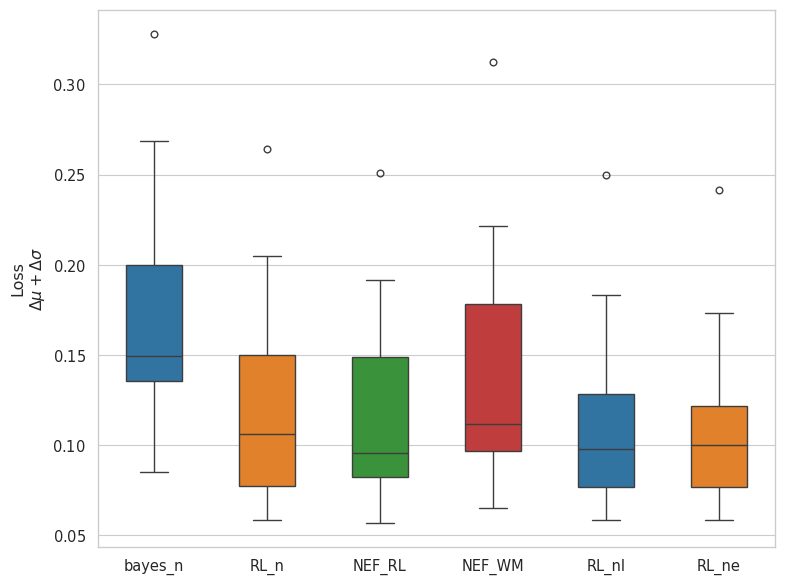

In [4]:
bayes_n = pd.read_pickle("data/bayes_n_carrabin_feb12_performance.pkl")
rl_n = pd.read_pickle("data/RL_n2_carrabin_feb12_performance.pkl")
# nef_rl = pd.read_pickle("data/NEF_RL_carrabin_feb12_performance.pkl")
# nef_rl2 = pd.read_pickle("data/NEF_RL_carrabin_feb17_performance.pkl")
# nef_rl = pd.read_pickle("data/NEF_RL_carrabin_feb19_performance.pkl")
# nef_wm = pd.read_pickle("data/NEF_WM_carrabin_feb19_performance.pkl")
nef_rl = pd.read_pickle("data/NEF_RL_carrabin_feb21_performance.pkl")
nef_wm = pd.read_pickle("data/NEF_WM_carrabin_feb21_performance.pkl")
RL_nl = pd.read_pickle("data/RL_nl_carrabin_feb21_performance.pkl")
RL_ne = pd.read_pickle("data/RL_ne_carrabin_feb21_performance.pkl")
rl_n['type'] = "RL_n"
combined = pd.concat([bayes_n, rl_n, nef_rl, nef_wm, RL_nl, RL_ne], ignore_index=True)

with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6), sharex=True, sharey='row')
    sns.boxplot(combined, x='type', y='loss', hue='type', ax=ax, palette=palette[:4], notch=False, width=0.5)
    ax.set(xlabel=None, ylabel='Loss\n'+'$\Delta \mu + \Delta \sigma$') 
    plt.tight_layout()
    fig.savefig("plots/carrabin_performance.jpg", dpi=600)

# Compare parameters

In [3]:
print("RL_n", pd.read_pickle("data/RL_n2_carrabin_feb12_params.pkl"))
print("NEF_RL", pd.read_pickle("data/NEF_RL_carrabin_feb21_params.pkl"))
print("NEF_WM", pd.read_pickle("data/NEF_WM_carrabin_feb21_params.pkl"))

RL_n      type  sid        mu     sigma
0   RL_n2    1  0.148405  0.036854
1   RL_n2    2  0.252626  0.055038
2   RL_n2    3  0.180294  0.022825
3   RL_n2    4  0.404855  0.174151
4   RL_n2    5  0.172628  0.102807
5   RL_n2    6  0.325853  0.063533
6   RL_n2    7  0.051130  0.056384
7   RL_n2    8  0.322492  0.136752
8   RL_n2    9  0.224014  0.028732
9   RL_n2   10  0.093947  0.071101
10  RL_n2   11  0.180957  0.047266
11  RL_n2   12  0.227716  0.081749
12  RL_n2   13  0.272078  0.109484
13  RL_n2   14  0.161241  0.014479
14  RL_n2   15  0.149817  0.042771
15  RL_n2   16  0.214328  0.059137
16  RL_n2   17  0.163447  0.093983
17  RL_n2   18  0.198266  0.060077
18  RL_n2   19  0.241531  0.053313
19  RL_n2   20  0.108042  0.068248
20  RL_n2   21  0.184872  0.042816
NEF_RL       type  sid  alpha  n_error
0   NEF_RL    1   0.17       90
1   NEF_RL    2   0.31       40
2   NEF_RL    3   0.20      350
3   NEF_RL    4   0.73       10
4   NEF_RL    5   0.21       30
5   NEF_RL    6   0.39    